# Antes de empezar:

    Lee el archivo README.md
    Comenta todo lo que puedas y utiliza los recursos (archivo README.md)
    ¡Feliz aprendizaje!

En este ejercicio, generaremos números aleatorios a partir de las disribuciones continuas que aprendimos en la lección. Hay dos formas de generar números aleatorios:

1. Usando la librería numpy 
1. Usando la librería Scipy 

Utiliza cualquiera de las dos librerías o ambas en este ejercicio.

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Distribución Uniforme

Para generar números aleatorios uniformes entre dos valores dados usando scipy, podemos usar el siguiente código o el código que hemos
discutido en clase:

In [112]:
min_value = 0  
max_value = 10  

n_samples = 5

random_numbers = np.random.randint(min_value, max_value + 1, size=n_samples)
print(random_numbers)

[4 3 8 4 9]


**Tarea:**

1. Basándote en el código anterior, escribe una función que genere números aleatorios uniformemente distribuidos. Hay varios requisitos para tu función:
    * Debe aceptar 3 parámetros: 
        * `bottom` - el límite inferior de los números generados
        * `ceiling` - el límite superior de los números generados
        * `count` - cuántos números generar
    * Debe devolver una matriz de números aleatorios distribuidos uniformemente

2. Llama a tu función con 2 conjuntos de parámetros a continuación:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

3. Traza las distribuciones uniformes generadas anteriormente utilizando histogramas, donde el eje x es el valor y el eje y es el recuento. Que el número de intervalos del histograma sea 10.

El resultado debe ser como el siguiente:

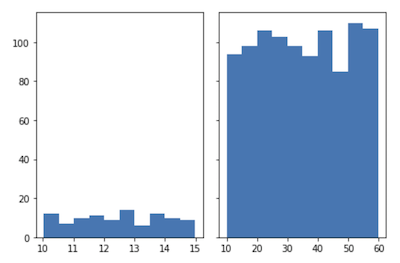

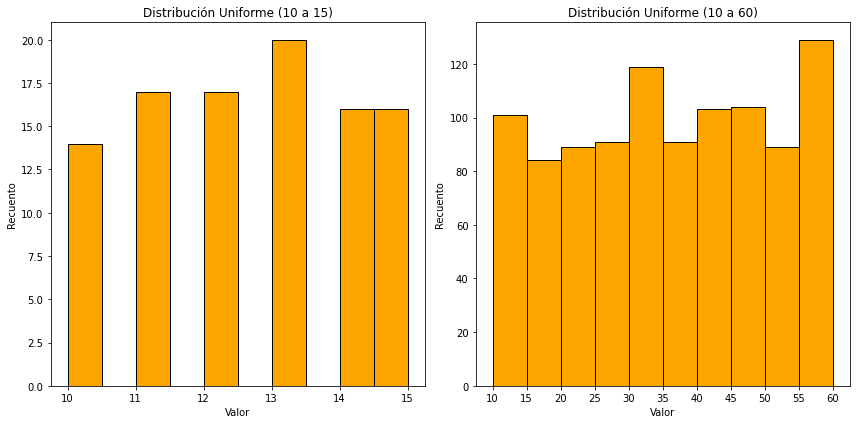

In [113]:
import numpy as np
import matplotlib.pyplot as plt

def generate_uniform_random_numbers(bottom, ceiling, count):
    return np.random.randint(bottom, ceiling + 1, size=count)

numbers1 = generate_uniform_random_numbers(bottom=10, ceiling=15, count=100)
numbers2 = generate_uniform_random_numbers(bottom=10, ceiling=60, count=1000)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(numbers1, bins=10,  edgecolor='black',color='orange', alpha=1)
plt.title('Distribución Uniforme (10 a 15)')
plt.xlabel('Valor')
plt.ylabel('Recuento')
plt.xticks(range(10, 16)) 

plt.subplot(1, 2, 2)
plt.hist(numbers2, bins=10,  edgecolor='black',color='orange', alpha=1)
plt.title('Distribución Uniforme (10 a 60)')
plt.xlabel('Valor')
plt.ylabel('Recuento')
plt.xticks(range(10, 61, 5)) 

plt.tight_layout()
plt.show()


How are the two distributions different?

In [114]:
print("la primera distribución representa una selección limitada de valores que puede dar lugar a picos más pronunciados en el histograma, mientras que la segunda distribución, con un rango más amplio y una mayor cantidad de muestras, generará probablemente un histograma más suave y uniforme. Esta diferencia destaca cómo el tamaño de la muestra y el rango influyen en la representación de los datos en los histogramas.")

la primera distribución representa una selección limitada de valores que puede dar lugar a picos más pronunciados en el histograma, mientras que la segunda distribución, con un rango más amplio y una mayor cantidad de muestras, generará probablemente un histograma más suave y uniforme. Esta diferencia destaca cómo el tamaño de la muestra y el rango influyen en la representación de los datos en los histogramas.


## Distribución Normal

1. De la misma manera en el reto de Distribución Uniforme, escriba una función que genere números aleatorios distribuidos normalmente.
1. Genera 1.000 números distribuidos normalmente con media de 10 y desviación típica de 1
1. Genera 1.000 números distribuidos normalmente con una media de 10 y una desviación típica de 50
2. Representa gráficamente las distribuciones de los datos generados.

Resultado esperado:

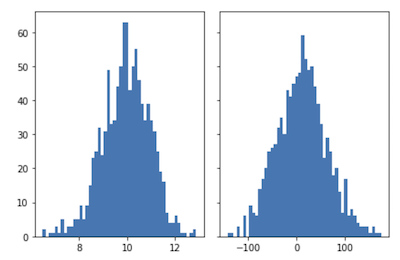

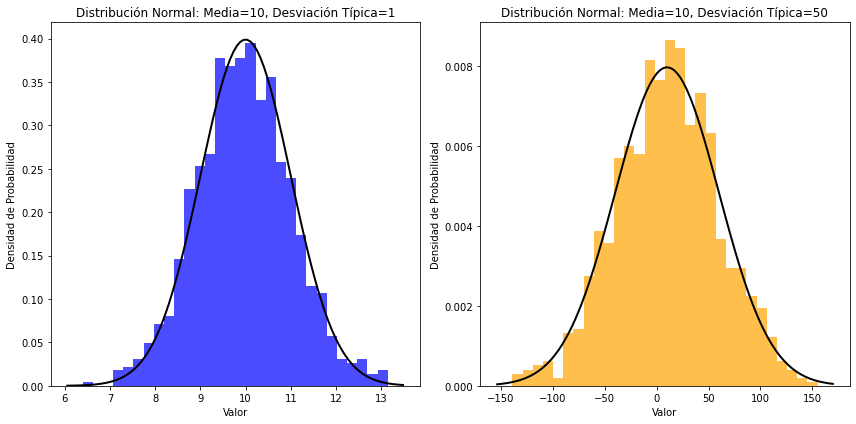

In [115]:
from scipy.stats import norm 
def generate_normal_distribution(mean, std_dev, count):
    return np.random.normal(loc=mean, scale=std_dev, size=count)

data_1 = generate_normal_distribution(mean=10, std_dev=1, count=1000)

data_2 = generate_normal_distribution(mean=10, std_dev=50, count=1000)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data_1, bins=30, color='blue', alpha=0.7, density=True)
plt.title('Distribución Normal: Media=10, Desviación Típica=1')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 10, 1)
plt.plot(x, p, 'k', linewidth=2)


plt.subplot(1, 2, 2)
plt.hist(data_2, bins=30, color='orange', alpha=0.7, density=True)
plt.title('Distribución Normal: Media=10, Desviación Típica=50')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 10, 50)
plt.plot(x, p, 'k', linewidth=2)

plt.tight_layout()
plt.show()

How are the two distributions different?

In [116]:
print("la principal diferencia entre las dos distribuciones radica en la dispersión de los datos, lo que afecta cómo se distribuyen los valores alrededor de la media y, por lo tanto, su interpretación en un análisis estadístico.")

la principal diferencia entre las dos distribuciones radica en la dispersión de los datos, lo que afecta cómo se distribuyen los valores alrededor de la media y, por lo tanto, su interpretación en un análisis estadístico.


## Distribución Normal de Datos Reales

En este reto vamos a echar un vistazo a los datos reales. Utilizaremos el archivo vehicles.csv para este ejercicio

In [117]:
vehicles_df = pd.read_csv("vehicles.csv")

Primero importa vehicles.csv.
A continuación, traza los histogramas de las siguientes variables:

1. Barriles de combustible/año

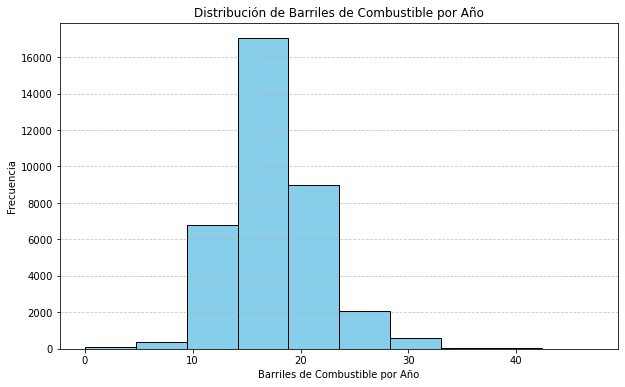

In [118]:


# Trazar el histograma para la columna 'Fuel Barrels/Year'
plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['Fuel Barrels/Year'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Barriles de Combustible por Año')
plt.xlabel('Barriles de Combustible por Año')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Emisiones de CO2 Gramos/Milla 

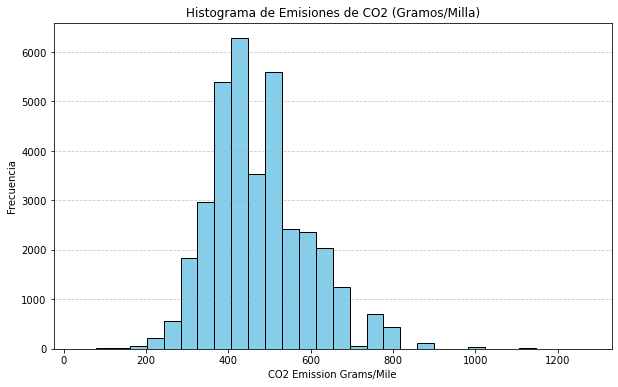

In [119]:

plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['CO2 Emission Grams/Mile'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Emisiones de CO2 (Gramos/Milla)')
plt.xlabel('CO2 Emission Grams/Mile')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

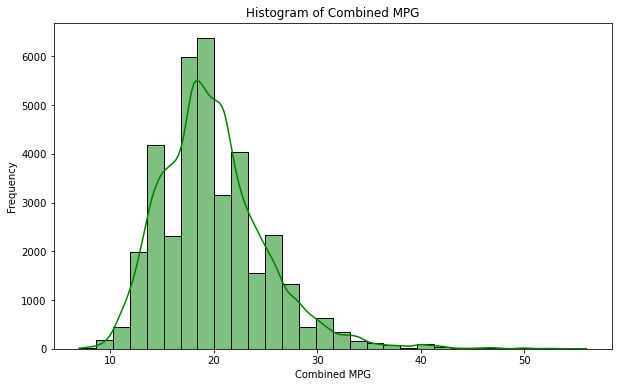

In [120]:

plt.figure(figsize=(10, 6))
sns.histplot(data=vehicles_df, x="Combined MPG", kde=True, bins=30, color="green")
plt.title("Histogram of Combined MPG")
plt.xlabel("Combined MPG")
plt.ylabel("Frequency")
plt.show()


¿Cuál o cuáles de las variables tienen una distribución casi normal? ¿Cómo lo sabes?

In [121]:
print("El  primer y segundo gráfico muestran una distribución casi normal, se puede ver a simple vista con la forma del gráfico, los extremos casi aplanados y simétricos")

El  primer y segundo gráfico muestran una distribución casi normal, se puede ver a simple vista con la forma del gráfico, los extremos casi aplanados y simétricos


Ninguno de ellos está normalmente ditribuido. 

## Distribución Exponencial

1. Utilizando `numpy.random.exponential`, crea una función que devuelva una lista de números distribuidos exponencialmente con la media de 10. 

1. Utiliza la función para generar dos secuencias de números de tamaño 10 y 100.

1. 2. Traza las distribuciones como histogramas con el número de bins como 100.

El resultado debe ser como el siguiente:

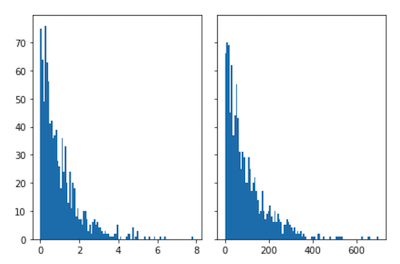

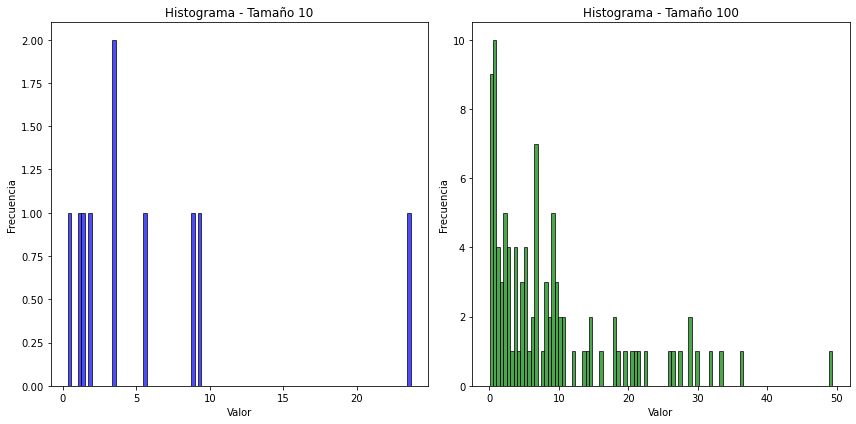

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def generar_exponencial(tamano, media=10):
    return np.random.exponential(media, tamano)

sec1 = generar_exponencial(10)
sec2 = generar_exponencial(100)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(sec1, bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histograma - Tamaño 10')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(sec2, bins=100, color='green', edgecolor='black', alpha=0.7)
plt.title('Histograma - Tamaño 100')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


¿En qué se diferencian ambas distribuciones?

La media cambia, por lo que la distribución también cambia. 

## Distribución Exponencial de datos reales

Supongamos que el tiempo que uno pasa en un banco se distribuye exponencialmente con media de 10 minutos (es decir, λ = 1/10). ¿Cuál es la probabilidad de que un cliente pase menos de quince minutos en el banco? 

Escribe un código en python para resolver este problema

In [132]:

media = 10  
lambda_ = 1 / media  
t = 15  

probabilidad = 1 - np.exp(-lambda_ * t)

print(f"La probabilidad de que un cliente pase menos de 15 minutos en el banco es: {probabilidad:.4f}")


La probabilidad de que un cliente pase menos de 15 minutos en el banco es: 0.7769


¿Cuál es la probabilidad de que el cliente pase más de 15 minutos?

In [133]:

probabilidad_mas_15 = np.exp(-lambda_ * t)

print(f"La probabilidad de que un cliente pase más de 15 minutos en el banco es: {probabilidad_mas_15:.4f}")



La probabilidad de que un cliente pase más de 15 minutos en el banco es: 0.2231
